<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

Although colleges are neutral to both SAT or ACT as the admission metric, it appears that individual states have an inclination towards one of the two tests ([*source*](https://www.collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/)). This could likely be a result of influence by their peers, seniors, or parents.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

`act_2017.csv`,`act_2018.csv`,`act_2019.csv`,`sat_2017.csv`,`sat_2018.csv`,`sat_2019.csv` are used.<br>
For each dataset, the `participation` and `total` or `composite` scores are used for the analysis below.


### Outside Research

Due to the pandemic in recent years, several colleges have moved to test-optional (i.e. waiving the SAT/ACT admission requirement) temporarily or permanently. However, it must be reminded that although admission may not require such test, the award of a scholarship tends to rely on the submission of such tests ([*source*](https://blog.getintocollege.com/How-do-Test-Optional-Schools-Award-Merit-Scholarships)).

This is evident in market obsevation that despite colleges moving towards test-optional, admission for SAT preparatory courses are not dwindling ([*source*](https://www.kold.com/2022/02/01/enrollment-sat-prep-courses-increasing-despite-most-universities-waiving-test-amid-pandemic/)).

If anything, the move towards test-optional could in fact <b>boost</b> SAT/ACT rates as applicants try to outshine others. Now that the barrier to entry is seemingly lowered and the appplicant pool enlarged ([*source*](https://tower.mastersny.org/7368/showcase/as-colleges-go-test-optional-application-rates-surge/)), above average students would naturally want to distinguish themselves from the cohort. Although colleges had declared that applicants who do not submit test results are not disdavantaged, many do not believe this to be well enforced, and has decided not to leave fate in the hands of the admission manager. One would rather have a test score than without, especially when applying to top colleges ([*source*](https://nypost.com/dispatch/what-test-optional-really-means-for-college-applications/)).

Collectively, these factors could indirectly drive up the uptake of the tests.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def get_mean(lst)->float:
    '''
    Calculate mean of a list of numbers
    
    lst: List of input numbers
    return: Mean value
    '''
    return sum(lst)/len(lst)

test_list=[1,2,3,4,5,8]

get_mean(test_list)

3.8333333333333335

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def get_sd(lst)->float:
    '''
    Calculate standard deviation of a list of numbers
    
    lst: List of input numbers
    return: Standard Deviation
    '''
    mean=get_mean(lst)
    return (sum([(x-mean)**2 for x in lst])/len(lst))**0.5

test_list=[1,2,3,4,5,8]

get_sd(test_list)

2.266911751455907

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def remove_percentage_sign(string)->float:
    '''
    Removes % from a string and returns as decimal
    i.e. 50% -> 0.5
    
    string: A string with % ranging from 0 to 100 (i.e. 0% to 100%)
    return: Percentage in decimals (0.0 to 1.0)
    '''
    
    return float(string.replace("%",""))/100

remove_percentage_sign("30.5%")

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from matplotlib.patches import Rectangle
from pandas.api.types import is_numeric_dtype

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [6]:
#import 
df_act=[
    pd.read_csv("../data/act_2017.csv"),
    pd.read_csv("../data/act_2018.csv"),
    pd.read_csv("../data/act_2019.csv")
]

df_sat=[
    pd.read_csv("../data/sat_2017.csv"),
    pd.read_csv("../data/sat_2018.csv"),
    pd.read_csv("../data/sat_2019.csv")
]

In [7]:
#number of years (2017 to 2019)
n_years=3

In [8]:
#Pick out columns that we want
cols_to_retain=["State","Participation","Composite"]
for i in range(n_years):
    try:
        df_act[i]=df_act[i][cols_to_retain]
    except Exception as e:
        print(e)

cols_to_retain=["State","Participation","Total"]
for i in range(n_years):
    try:
        df_sat[i]=df_sat[i][cols_to_retain]
    except:
        try:
            df_sat[i].rename(columns={"Participation Rate":"Participation"},errors="ignore",inplace=True)
            df_sat[i]=df_sat[i][cols_to_retain]
        except Exception as e:
            print(e)

In [9]:
# add the Year into the dfs through a series and concat dfs into 1 master df

df_act=pd.concat([
    pd.concat([df_act[0],
           pd.Series(['2017']).repeat(df_act[0].shape[0]).rename("Year").reset_index(drop=True)],
          axis=1),
    pd.concat([df_act[1],
           pd.Series(['2018']).repeat(df_act[1].shape[0]).rename("Year").reset_index(drop=True)],
          axis=1),
    pd.concat([df_act[2],
           pd.Series(['2019']).repeat(df_act[2].shape[0]).rename("Year").reset_index(drop=True)],
          axis=1)
],axis=0).reset_index(drop=True)

df_sat=pd.concat([
    pd.concat([df_sat[0],
           pd.Series(['2017']).repeat(df_sat[0].shape[0]).rename("Year").reset_index(drop=True)],
          axis=1),
    pd.concat([df_sat[1],
           pd.Series(['2018']).repeat(df_sat[1].shape[0]).rename("Year").reset_index(drop=True)],
          axis=1),
    pd.concat([df_sat[2],
           pd.Series(['2019']).repeat(df_sat[2].shape[0]).rename("Year").reset_index(drop=True)],
          axis=1)
],axis=0).reset_index(drop=True)

In [10]:
#drop duplicated rows
df_act=df_act.drop_duplicates(subset=['State','Year'])
df_sat=df_sat.drop_duplicates(subset=['State','Year'])

In [11]:
#drop rows with 'National' in it. Not needed.
df_act=df_act[~(df_act['State']=="National")]
df_sat=df_sat[~(df_sat['State']=="National")]

In [12]:
#Set title case for all rows in 'State'
df_act['State']=df_act['State'].str.title()
df_sat['State']=df_sat['State'].str.title()

In [13]:
#merge ACT and SAT into a single df
df=pd.merge(left=df_act,right=df_sat,how="outer",on=["State","Year"],suffixes=["_ACT","_SAT"])

In [14]:
#Rename column to ACT and SAT accordingly
df.rename(columns={"Participation_ACT":"P_ACT","Participation_SAT":"P_SAT","Composite":"S_ACT","Total":"S_SAT"},inplace=True)

In [15]:
def try_float(x):
    '''
    Attempt to cast a string to float, and store it as decimal between 0 to 1.
    If value is outside 0 or 1 (inclusive), return NaN
    If unable to cast to float, return NaN
    
    x: string to be casted into float
    return: float decimal or NaN
    '''
    try:
        value = remove_percentage_sign(str(x))
        if (value > 1) | (value < 0):
            return np.nan
        return value
    except:
        return np.nan

In [16]:
#remove percentage sign from participation rates and attempt to cast to float

participations=['P_ACT','P_SAT']
for part in participations:
    df[part]=df[part].map(try_float)

In [17]:
def normalize_act(x):
    '''
    Calculate the normalized score of the raw ACT grade based on score range of 1 to 36
    A score of 0 is not possible.
    
    Function auto extract the numerical portion of the input and ignore non numerical portions
    
    Returns a normalized decimal between 0 to 1
    
    If normalized score is outside 0 to 1, return NaN
    If raw grade does not contain a number, return NaN
    
    x: ACT raw grade
    return: normalized ACT score
    '''
    
    #extract decimal portion
    x=re.findall('\d+.\d+|$', str(x))
    
    try:
        #since the true range of the score 1 to 36 is only 35
        value=(float(x[0])-1)/35
        if (value > 1) | (value < 0):
            return np.nan
        return value
    except:
        return np.nan

In [18]:
def normalize_sat(x):
    '''
    Calculate the normalized score of the raw SAT grade based on score range of 400 to 1600
    A score of below 400 is not possible.
    
    Function auto extract the numerical portion of the input and ignore non numerical portions
    
    Returns a normalized decimal between 0 to 1
    
    If normalized score is outside 0 to 1, return NaN
    If raw grade does not contain a number, return NaN
    
    x: SAT raw grade
    return: normalized SAT score
    '''
    
    #extract decimal portion
    x=re.findall('\d+.\d+|$', str(x))
    
    try:
        #since the true range of the score 400 to 1600 is only 1200
        value=(float(x[0])-400)/1200
        if (value > 1) | (value < 0):
            return np.nan
        return value
    except:
        return np.nan

In [19]:
#normalize ACT and SAT scores

# for i in range(n_years):
df['S_ACT']=df['S_ACT'].map(normalize_act)
df['S_SAT']=df['S_SAT'].map(normalize_sat)

In [20]:
#save to csv
df.to_csv("cleaned.csv")

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|act_2017, act_2018, act_2019, sat_2017, sat_2018, sat_2019|State which the metric is reported for|
|Year|int|act_2017, act_2018, act_2019, sat_2017, sat_2018, sat_2019|Year which the metric is reported for|
|P_ACT|float|act_2017, act_2018, act_2019|ACT participation rate|
|S_ACT|float|act_2017, act_2018, act_2019|ACT normalized scores|
|P_SAT|float|sat_2017, sat_2018, sat_2019|SAT participation rate|
|S_SAT|float|sat_2017, sat_2018, sat_2019|SAT normalized scores|



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Summary Statistics

In [21]:
df.describe()

,P_ACT,S_ACT,P_SAT,S_SAT
count,153.000000,153.000000,153.000000,155.000000
mean,0.618824,0.585528,0.448693,0.597839
std,0.334678,0.059895,0.370944,0.079792
min,0.060000,0.477143,0.020000,0.445833
25%,0.290000,0.537143,0.040000,0.543333
50%,0.660000,0.580000,0.500000,0.581667
75%,1.000000,0.645714,0.760000,0.674167
max,1.000000,0.702857,1.000000,0.748333


#### Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.

In [22]:
sd={key:get_sd(list(df.loc[:,key].dropna())) for key in df.columns if is_numeric_dtype(df[key].dtype)}
sd

{'P_ACT': 0.33358214474024833,
 'S_ACT': 0.059698833505362245,
 'P_SAT': 0.3697299717899723,
 'S_SAT': 0.0795341891709508}

#### Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?

In [49]:
for y in ["2017","2018","2019"]:
    cdf=df[df['Year']==y]
    for t in ["SAT","ACT"]:
        print(f"Highest {t} participation in {y}: {cdf[f'P_{t}'].max():.0%} \n \
            {', '.join(list(cdf['State_abbr'][cdf[f'P_{t}']==cdf[f'P_{t}'].max()]))}")
        print("")
        print(f"Lowest {t} participation in {y}: {cdf[f'P_{t}'].min():.0%} \n \
            {', '.join(list(cdf['State_abbr'][cdf[f'P_{t}']==cdf[f'P_{t}'].min()]))}")
        print("----------------------------------------------------------------------------------")

Highest SAT participation in 2017: 100% 
             CT, DE, DC, MI

Lowest SAT participation in 2017: 2% 
             IA, MS, ND
----------------------------------------------------------------------------------
Highest ACT participation in 2017: 100% 
             AL, AR, CO, KY, LA, MN, MS, MO, MT, NV, NC, OK, SC, TN, UT, WI, WY

Lowest ACT participation in 2017: 8% 
             ME
----------------------------------------------------------------------------------
Highest SAT participation in 2018: 100% 
             CO, CT, DE, ID, MI

Lowest SAT participation in 2018: 2% 
             ND
----------------------------------------------------------------------------------
Highest ACT participation in 2018: 100% 
             AL, AR, KY, LA, MS, MO, MT, NE, NV, NC, OH, OK, SC, TN, UT, WI, WY

Lowest ACT participation in 2018: 7% 
             ME
----------------------------------------------------------------------------------
Highest SAT participation in 2019: 100% 
             CO

We observe that Connecticut, Michican, Delaware consistently have 100% SAT participation, whereas North Dakota consistently showed the lowest SAT participation.<br><br>
Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, Tennessee, Utah, Wisconsin, Wyoming consistenly have 100% ACT participation, whereas Main has the lowest consistently.

#### Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?

In [50]:
for y in ["2017","2018","2019"]:
    cdf=df[df['Year']==y]
    for t in ["SAT","ACT"]:
        print(f"Highest {t} Score in {y}: {cdf[f'S_{t}'].max():.0%} \n \
            {', '.join(list(cdf['State_abbr'][cdf[f'S_{t}']==cdf[f'S_{t}'].max()]))}")
        print("")
        print(f"Lowest {t} Score in {y}: {cdf[f'S_{t}'].min():.0%} \n \
            {', '.join(list(cdf['State_abbr'][cdf[f'S_{t}']==cdf[f'S_{t}'].min()]))}")
        print("----------------------------------------------------------------------------------")

Highest SAT Score in 2017: 75% 
             MN

Lowest SAT Score in 2017: 46% 
             DC
----------------------------------------------------------------------------------
Highest ACT Score in 2017: 70% 
             NH

Lowest ACT Score in 2017: 48% 
             NV
----------------------------------------------------------------------------------
Highest SAT Score in 2018: 75% 
             MN

Lowest SAT Score in 2018: 48% 
             DC
----------------------------------------------------------------------------------
Highest ACT Score in 2018: 70% 
             CT

Lowest ACT Score in 2018: 48% 
             NV
----------------------------------------------------------------------------------
Highest SAT Score in 2019: 74% 
             MN

Lowest SAT Score in 2019: 45% 
             VI
----------------------------------------------------------------------------------
Highest ACT Score in 2019: 70% 
             CT, MA

Lowest ACT Score in 2019: 48% 
             NV
-----

SAT wise, Minnesota performs the best whereas DC performs the worst 2 out of 3 times.<br>
ACT wise, Connecticut performs the best 2/3 times whereas Nevada is constantly the worst.

#### Do any states show have >50% participation on both tests each year?

In [25]:
df[(df['P_SAT']>0.5)&(df['P_ACT']>0.5)]

,State,P_ACT,S_ACT,Year,P_SAT,S_SAT
9,Florida,0.73,0.537143,2017,0.83,0.514167
10,Georgia,0.55,0.582857,2017,0.61,0.541667
11,Hawaii,0.90,0.514286,2017,0.55,0.570833
60,Florida,0.66,0.540000,2018,0.56,0.582500
61,Georgia,0.53,0.582857,2018,0.70,0.553333
62,Hawaii,0.89,0.511429,2018,0.56,0.508333
84,North Carolina,1.00,0.517143,2018,0.52,0.581667
91,South Carolina,1.00,0.494286,2018,0.55,0.558333
111,Florida,0.54,0.545714,2019,1.00,0.499167
113,Hawaii,0.80,0.514286,2019,0.54,0.583333


The states who perform the best/worst don't show up on this list of >50% participation for both tests.
<br>
This suggests that there may be some form of delibrate push from states/schools toward one type of test instead of leaving it to random choice.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Do some data cleaning / engineering first

In [26]:
us_state_to_abbrev = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
                      "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
                      "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
                      "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
                      "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
                      "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM",
                      "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
                      "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
                      "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
                      "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI",
                      "Wyoming": "WY", "District Of Columbia": "DC", "American Samoa": "AS", "Guam": "GU",
                      "Northern Mariana Islands": "MP", "Puerto Rico": "PR", "United States Minor Outlying Islands": "UM",
                      "Virgin Islands": "VI"}
us_states_to_region= {'AK': 'Others', 'AL': 'South', 'AR': 'South', 'AS': 'Others', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'CT': 'North', 'DC': 'North',
                      'DE': 'North', 'FL': 'South', 'GA': 'South', 'GU': 'Others', 'HI': 'Others', 'IA':  'Midwest', 'ID': 'West', 'IL':  'Midwest', 'IN':  'Midwest',
                      'KS':  'Midwest', 'KY': 'South', 'LA': 'South', 'MA': 'North', 'MD': 'North', 'ME': 'North', 'MI': 'West', 'MN':  'Midwest', 'MO':  'Midwest',
                      'MP': 'Others', 'MS': 'South', 'MT': 'West', 'NA': 'Others', 'NC': 'South', 'ND':  'Midwest', 'NE': 'West', 'NH': 'North', 'NJ': 'North',
                      'NM': 'West', 'NV': 'West', 'NY': 'North', 'OH':  'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'North', 'PR': 'Others', 'RI': 'North',
                      'SC': 'South', 'SD':  'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VA': 'South', 'VI': 'Others', 'VT': 'North', 'WA': 'West',
                      'WI':  'Midwest', 'WV': 'South', 'WY': 'West'}
df['State_abbr']=df['State'].map(us_state_to_abbrev)
df['State_region']=df['State_abbr'].map(us_states_to_region)


In [27]:
# a "total" metric which measures the combined effect of both tests
df['P_TOT']=(df['P_SAT']+df['P_ACT'])/2
df['S_TOT']=(df['S_SAT']+df['S_ACT'])/2

# a "swing" metric to show how different is the delta between ACT and SAT
df['P_SWING']=df['P_SAT']-df['P_ACT']
df['S_SWING']=df['S_SAT']-df['S_ACT']

In [28]:
#make a backup copy
df_orig=df.copy()

It appears ACT participation rate has an inverse correlation to ACT score and SAT Participation rate.<br>
SAT Participation also has inverse relation with SAT Score.

In [29]:
#manually fitted
x_var=np.arange(0.01,1,0.001)
y_var_ACT=(1/20)*np.tan(-np.pi*(x_var-0.5))+0.6
y_var_SAT=(1/80)*np.tan(-np.pi*(x_var-0.5))+0.57

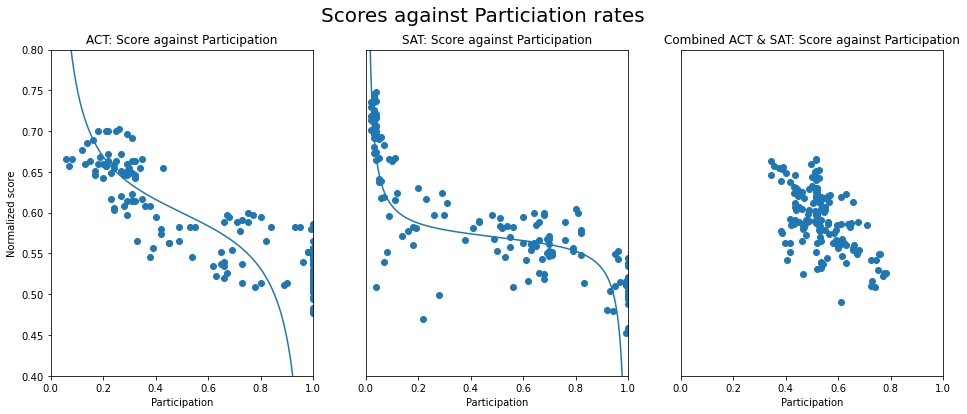

In [30]:
df=df_orig.copy()
fig=plt.figure(figsize = (16,6))
ylim=[0.4,0.8]

ax1=plt.subplot(1,3,1)
ax1.scatter(df['P_ACT'],df['S_ACT'])
ax1.plot(x_var,y_var_ACT)
ax1.set_xlim([0, 1])
ax1.set_ylim(ylim)
ax1.set_ylabel("Normalized score")
ax1.set_xlabel("Participation")
ax1.set_title("ACT: Score against Participation")

ax2=plt.subplot(1,3,2)
ax2.scatter(df['P_SAT'],df['S_SAT'])
ax2.plot(x_var,y_var_SAT)
ax2.set_xlim([0, 1])
ax2.set_ylim(ylim)
ax2.yaxis.set_visible(False)
ax2.set_xlabel("Participation")
ax2.set_title("SAT: Score against Participation")

ax3=plt.subplot(1,3,3)
ax3.scatter(df['P_TOT'],df['S_TOT'])
ax3.set_xlim([0, 1])
ax3.set_ylim(ylim)
ax3.yaxis.set_visible(False)
ax3.set_xlabel("Participation")
ax3.set_title("Combined ACT & SAT: Score against Participation")

_=fig.suptitle("Scores against Particiation rates",fontsize=20)

It appears that within SAT and ACT, Score and Participation have an inverse correlation.<br>
However, as a total, then there is no clear correlation.
Let's look at the correlation heatmap to find out more.

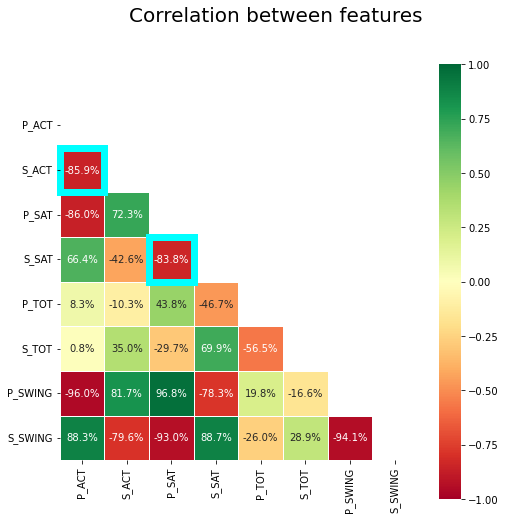

In [32]:
fig=plt.figure(figsize = (8,8))
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(corr, mask = mask, square = True, annot = True, fmt=".1%", vmin = -1, vmax = 1, linewidths = .5,cmap="RdYlGn")
ax.add_patch(Rectangle((0, 1), 1, 1, fill=False, edgecolor='cyan', lw=7, clip_on=False))
ax.add_patch(Rectangle((2, 3), 1, 1, fill=False, edgecolor='cyan', lw=7, clip_on=False))

_=fig.suptitle("Correlation between features",size=20)

Indeed there is strong negative correlation between S_ACT & P_ACT, S_SAT & P_SAT

These numbers surface an interesting phenomenon.  
In states that have many people taking the test, they generally don't do well.  
On the contrary, states who have few candidates do exceptionally well.  
  

If we think about it, one reason could be because of the huge pool of candidates, causing the to scores gravitate towards the average. It could also be because that the candidates obtaing an average result causing multiple retakes of the test.  
On the flip side, states who posted very high scores could be a result of a few top candidates taking the test, getting a good score on the first try, and not retake.

#### Let's look at the distribution geographically

In [45]:
def plot_us_map(dataframe, key, colorbar_top_label,colorbar_bottom_label,scale=200,title="",colorscale='divergent',year=None):
    dataframe=dataframe.dropna()

    if year is not None:
        df_sub=dataframe[dataframe['Year']==str(year)]
    else:
        df_sub=dataframe.reset_index().groupby(by="State_abbr").agg('mean')
        df_sub=df_sub.reset_index()
    
        
    df_sub['text']=df_sub[key].apply('{:,.2f}'.format)
    fig = go.Figure()

    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        locations=df_sub['State_abbr'],
        text=df_sub['text'],
        mode='markers',
        marker=dict(
            size=abs(df_sub[key]*scale),
            sizemode='area',
            colorscale = 'rdbu' if colorscale == "divergent" else colorscale,
            color=df_sub[key],
            showscale=True,
            cmid=0 if colorscale=="divergent" else None,
            cmin=0 if colorscale!="divergent" else None
        ),
    #     name = ''
    ))
    
    fig.add_annotation(dict(
        xref="x domain",
        x=1,
        xshift=10,
        y=0.95,
        text=colorbar_top_label.replace(" ","<br>"),
        showarrow=False,
    ))
    
    fig.add_annotation(dict(
        xref="x domain",
        x=1,
        xshift=10,
        y=0.05,
        text=colorbar_bottom_label.replace(" ","<br>"),
        showarrow=False
    ))

    fig.update_layout(
        title=dict(
            text=title,
            x=0.5
        ),
        geo=dict(
            scope='usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
    fig.show()

In [46]:
plot_us_map(df_orig,key="P_SWING",scale=200,
            colorbar_top_label="Higher SAT participation",
            colorbar_bottom_label="Higher ACT participation",
           title="Participation distribution across USA")

It is interesting to note the geogrphical distribution of participation rates of SAT vs ACT.  
The Northeastern states, together with a few Western ones (CA, ID) and TX are observed to be inclined towards SAT.  
Midwest, Southwest, and Southeast tend to be inclined towards ACT.  
  
This is probably self-explanatory since most Ivy Leagues colleges are in the Northeastern area (Havard, MIT, NYU etc).  
Coupled with SAT's longer history (SAT 1926 vs ACT 1959), it is not surprising that SAT has stuck for legacy reasons.

In [47]:
plot_us_map(df_orig,key="S_SAT",scale=200,
            colorbar_top_label="Higher SAT score",
            colorbar_bottom_label="Lower SAT score",
            colorscale='blues',
           title="SAT score across USA")

In [48]:
plot_us_map(df_orig,key="S_ACT",scale=200,
            colorbar_top_label="Higher ACT score",
            colorbar_bottom_label="Lower ACT score",
            colorscale='reds',
           title="ACT score across USA")

Moving onto the distribution of the test results across the country,  
the inverse correlation between participation and scores become much clearer.  
  
States which have very high participation are noted to have a close-to-average score of, ranging 0.5 to 0.6.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!